# EXPLORATORY DATA ANALYSIS

IMPORT Library

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression  # Gantilah dengan model yang sesuai
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Tentukan path direktori yang ingin Anda lihat
direktori_path = 'D:\Data\Board Games'

# Gunakan os.listdir() untuk mendapatkan daftar semua file di dalam direktori
daftar_file = os.listdir(direktori_path)

pola_ekstensi = '*.csv'

# Gunakan glob.glob() untuk mendapatkan daftar file sesuai dengan pola ekstensi
daftar_file_txt = glob.glob(os.path.join(direktori_path, pola_ekstensi))

# Tampilkan daftar file dengan ekstensi tertentu
print("Daftar File dengan Ekstensi .csv di", direktori_path)
for file in daftar_file_txt:
    print(file)

Daftar File dengan Ekstensi .csv di D:\Data\Board Games
D:\Data\Board Games\details.csv
D:\Data\Board Games\ratings.csv


In [3]:
df_details = pd.read_csv('details.csv')
df_ratings = pd.read_csv('ratings.csv')

In [4]:
print(df_details.shape)
df_details.head()

(21631, 23)


,num,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,...,boardgamefamily,boardgameexpansion,boardgameimplementation,boardgamedesigner,boardgameartist,boardgamepublisher,owned,trading,wanting,wishing
0,0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,...,"['Components: Map (Global Scale)', 'Components...",['Pandemic: Gen Con 2016 Promos – Z-Force Team...,"['Pandemic Legacy: Season 0', 'Pandemic Legacy...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games', 'Albi', 'Asmodee', 'Asmodee It...",168364,2508,625,9344
1,1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,...,"['Cities: Carcassonne (France)', 'Components: ...","['20 Jahre Darmstadt Spielt', 'Apothecaries (f...","['The Ark of the Covenant', 'Carcassonne für 2...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",161299,1716,582,7383
2,2,13,Catan,"In CATAN (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,...,"['Animals: Sheep', 'Components: Hexagonal Tile...","['20 Jahre Darmstadt Spielt', 'Brettspiel Adve...","['Baden-Württemberg Catan', 'Catan Geographies...",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Asmodee', 'As...",167733,2018,485,5890
3,3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,...,"['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...","['7 Wonders: Armada', '7 Wonders: Babel', '7 W...","['7 Wonders (Second Edition)', '7 Wonders Duel...",['Antoine Bauza'],"['Dimitri Chappuis', 'Miguel Coimbra', 'Etienn...","['Repos Production', 'ADC Blackfire Entertainm...",120466,1567,1010,12105
4,4,36218,Dominion,"&quot;You are a monarch, like your parents bef...",2008,2,4,30,30,30,...,"['Crowdfunding: Wspieram', 'Game: Dominion', '...","['Ancient Times (fan expansion for Dominion)',...","['Dominion (Second Edition)', 'Het Koninkrijk ...",['Donald X. Vaccarino'],"['Matthias Catrein', 'Julien Delval', 'Tomasz ...","['Rio Grande Games', '999 Games', 'Albi', 'Bar...",106956,2009,655,8621


In [5]:
df_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21631 entries, 0 to 21630
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   num                      21631 non-null  int64 
 1   id                       21631 non-null  int64 
 2   primary                  21631 non-null  object
 3   description              21630 non-null  object
 4   yearpublished            21631 non-null  int64 
 5   minplayers               21631 non-null  int64 
 6   maxplayers               21631 non-null  int64 
 7   playingtime              21631 non-null  int64 
 8   minplaytime              21631 non-null  int64 
 9   maxplaytime              21631 non-null  int64 
 10  minage                   21631 non-null  int64 
 11  boardgamecategory        21348 non-null  object
 12  boardgamemechanic        20041 non-null  object
 13  boardgamefamily          17870 non-null  object
 14  boardgameexpansion       5506 non-null

Drop features from details data frame with high null counts

In [6]:
df_details.isnull().sum() / len(df_details)

num                        0.000000
id                         0.000000
primary                    0.000000
description                0.000046
yearpublished              0.000000
minplayers                 0.000000
maxplayers                 0.000000
playingtime                0.000000
minplaytime                0.000000
maxplaytime                0.000000
minage                     0.000000
boardgamecategory          0.013083
boardgamemechanic          0.073506
boardgamefamily            0.173871
boardgameexpansion         0.745458
boardgameimplementation    0.775230
boardgamedesigner          0.027553
boardgameartist            0.273080
boardgamepublisher         0.000046
owned                      0.000000
trading                    0.000000
wanting                    0.000000
wishing                    0.000000
dtype: float64

In [7]:
# Drop features from details data frame with high null counts
df_details.drop(columns=['boardgameexpansion', 'boardgameimplementation'], inplace=True)

In [8]:
#drop features details that will not be used
df_details.drop(columns=['description','boardgamecategory','boardgamemechanic', 'boardgamefamily', 'boardgamedesigner', 'boardgameartist', 'boardgamepublisher'], inplace=True)

In [9]:
df_details.head()

,num,id,primary,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,owned,trading,wanting,wishing
0,0,30549,Pandemic,2008,2,4,45,45,45,8,168364,2508,625,9344
1,1,822,Carcassonne,2000,2,5,45,30,45,7,161299,1716,582,7383
2,2,13,Catan,1995,3,4,120,60,120,10,167733,2018,485,5890
3,3,68448,7 Wonders,2010,2,7,30,30,30,10,120466,1567,1010,12105
4,4,36218,Dominion,2008,2,4,30,30,30,13,106956,2009,655,8621


In [10]:
print(df_ratings.shape)
df_ratings.head()

(21831, 10)


,num,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...


Drop high cardinality

In [11]:
#drop high cardinality
df_ratings.drop(columns=['url', 'thumbnail'], inplace=True)

In [12]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21831 entries, 0 to 21830
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   num            21831 non-null  int64  
 1   id             21831 non-null  int64  
 2   name           21831 non-null  object 
 3   year           21831 non-null  int64  
 4   rank           21831 non-null  int64  
 5   average        21831 non-null  float64
 6   bayes_average  21831 non-null  float64
 7   users_rated    21831 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


Merge 2 data frame into 1 data frame

In [13]:
#merge 2 data frame into 1 data frame
df = pd.merge(df_details, df_ratings, on='id')

In [14]:
df.head()

,num_x,id,primary,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,trading,wanting,wishing,num_y,name,year,rank,average,bayes_average,users_rated
0,0,30549,Pandemic,2008,2,4,45,45,45,8,...,2508,625,9344,105,Pandemic,2008,106,7.59,7.487,108975
1,1,822,Carcassonne,2000,2,5,45,30,45,7,...,1716,582,7383,189,Carcassonne,2000,190,7.42,7.309,108738
2,2,13,Catan,1995,3,4,120,60,120,10,...,2018,485,5890,428,Catan,1995,429,7.14,6.970,108024
3,3,68448,7 Wonders,2010,2,7,30,30,30,10,...,1567,1010,12105,72,7 Wonders,2010,73,7.74,7.634,89982
4,4,36218,Dominion,2008,2,4,30,30,30,13,...,2009,655,8621,103,Dominion,2008,104,7.61,7.499,81561


Tambahkan variabel target (populer atau tidak populer)

In [15]:
# Tambahkan variabel target (populer atau tidak populer)
threshold_rating = 6.5  # Ambil nilai rata-rata sebagai batas
df['is_popular'] = (df['average'] > threshold_rating).astype(int)

In [16]:
df.head()

,num_x,id,primary,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,wanting,wishing,num_y,name,year,rank,average,bayes_average,users_rated,is_popular
0,0,30549,Pandemic,2008,2,4,45,45,45,8,...,625,9344,105,Pandemic,2008,106,7.59,7.487,108975,1
1,1,822,Carcassonne,2000,2,5,45,30,45,7,...,582,7383,189,Carcassonne,2000,190,7.42,7.309,108738,1
2,2,13,Catan,1995,3,4,120,60,120,10,...,485,5890,428,Catan,1995,429,7.14,6.970,108024,1
3,3,68448,7 Wonders,2010,2,7,30,30,30,10,...,1010,12105,72,7 Wonders,2010,73,7.74,7.634,89982,1
4,4,36218,Dominion,2008,2,4,30,30,30,13,...,655,8621,103,Dominion,2008,104,7.61,7.499,81561,1


korelasi untuk tipe angka dalam bentuk heatmaps

Drop any columns that would create issues of multicollinearity

In [18]:
#Drop any columns that would create issues of multicollinearity
df.drop(columns=['minplaytime', 'maxplaytime', 'num_y', 'rank'], inplace=True)

Drop any columns that would constitute leakage for the target

In [19]:
df.head()

,num_x,id,primary,yearpublished,minplayers,maxplayers,playingtime,minage,owned,trading,wanting,wishing,name,year,average,bayes_average,users_rated,is_popular
0,0,30549,Pandemic,2008,2,4,45,8,168364,2508,625,9344,Pandemic,2008,7.59,7.487,108975,1
1,1,822,Carcassonne,2000,2,5,45,7,161299,1716,582,7383,Carcassonne,2000,7.42,7.309,108738,1
2,2,13,Catan,1995,3,4,120,10,167733,2018,485,5890,Catan,1995,7.14,6.970,108024,1
3,3,68448,7 Wonders,2010,2,7,30,10,120466,1567,1010,12105,7 Wonders,2010,7.74,7.634,89982,1
4,4,36218,Dominion,2008,2,4,30,13,106956,2009,655,8621,Dominion,2008,7.61,7.499,81561,1


In [20]:
df.drop(columns=['num_x', 'name', 'year'], inplace=True)

In [21]:
df.head()

,id,primary,yearpublished,minplayers,maxplayers,playingtime,minage,owned,trading,wanting,wishing,average,bayes_average,users_rated,is_popular
0,30549,Pandemic,2008,2,4,45,8,168364,2508,625,9344,7.59,7.487,108975,1
1,822,Carcassonne,2000,2,5,45,7,161299,1716,582,7383,7.42,7.309,108738,1
2,13,Catan,1995,3,4,120,10,167733,2018,485,5890,7.14,6.970,108024,1
3,68448,7 Wonders,2010,2,7,30,10,120466,1567,1010,12105,7.74,7.634,89982,1
4,36218,Dominion,2008,2,4,30,13,106956,2009,655,8621,7.61,7.499,81561,1


In [22]:
df.nunique()

id               21631
primary          21236
yearpublished      190
minplayers          11
maxplayers          52
playingtime        119
minage              21
owned             4226
trading            610
wanting            706
wishing           1797
average            631
bayes_average     1927
users_rated       3109
is_popular           2
dtype: int64

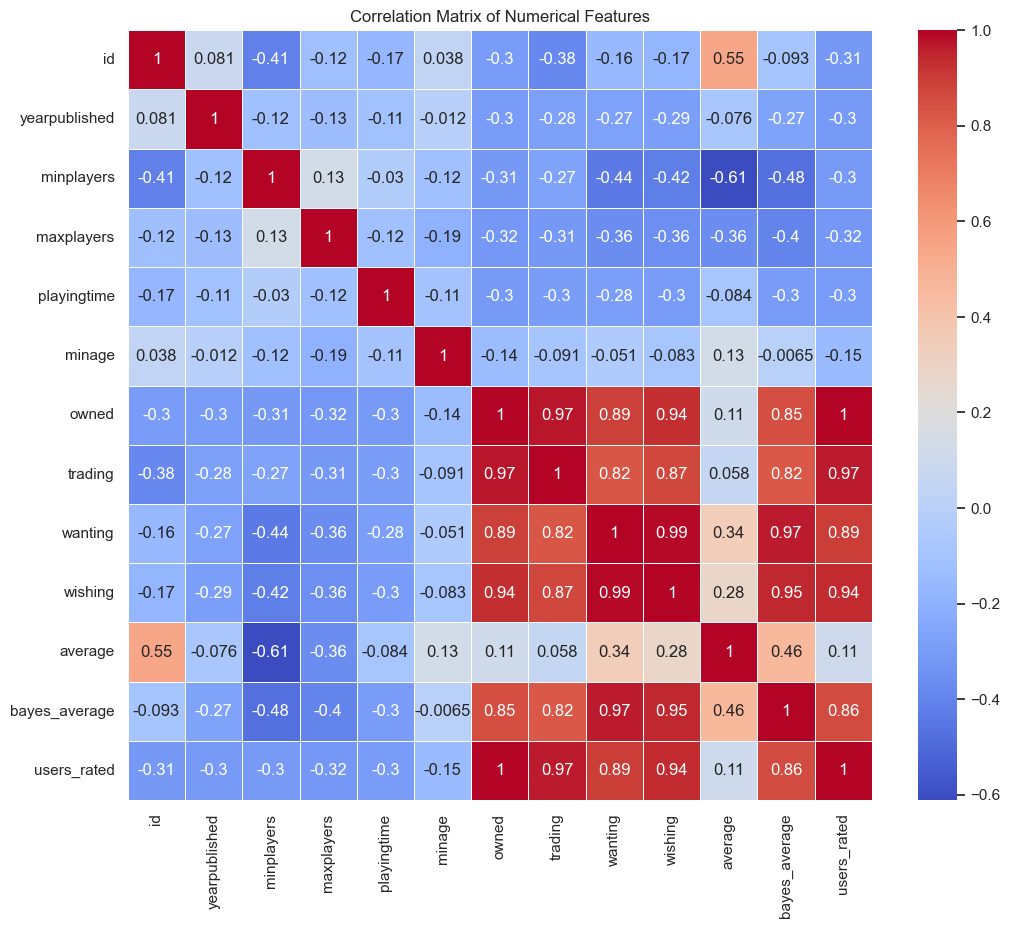

In [47]:
# Pilih fitur numerik yang ingin diambil korelasinya
corr = df.select_dtypes("number").drop(columns = "is_popular").corr()

# Hitung matriks korelasi
correlation_matrix = corr.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Model

Define features and target variable

In [23]:
#Define features and target variable
features = ['bayes_average', 'users_rated', 'minplayers', 'maxplayers', 'playingtime', 'minage', 'owned', 'trading', 'wanting', 'wishing']
target = 'is_popular'

Split the data into training and testing sets

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

Standardize features (optional but can be beneficial for logistic regression)

In [25]:
# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Initialize and train the logistic regression model

In [26]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

Initialize KFold cross-validation

In [27]:
# Initialize KFold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

Perform cross-validation

In [28]:
# Perform cross-validation
scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

Make predictions on the test set

In [29]:
# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

Evaluate the model

In [30]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Display the results

In [31]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', confusion_mat)
print('Classification Report:\n', classification_rep)
print(f'Cross-Validation Scores: {scores}')
print(f'Mean Accuracy: {scores.mean()}')

Accuracy: 0.823665357060319
Confusion Matrix:
 [[2131  224]
 [ 539 1433]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      2355
           1       0.86      0.73      0.79      1972

    accuracy                           0.82      4327
   macro avg       0.83      0.82      0.82      4327
weighted avg       0.83      0.82      0.82      4327

Cross-Validation Scores: [0.8266397  0.81594915 0.81797168 0.82201676 0.82601156]
Mean Accuracy: 0.8217177700988554


# Visualization

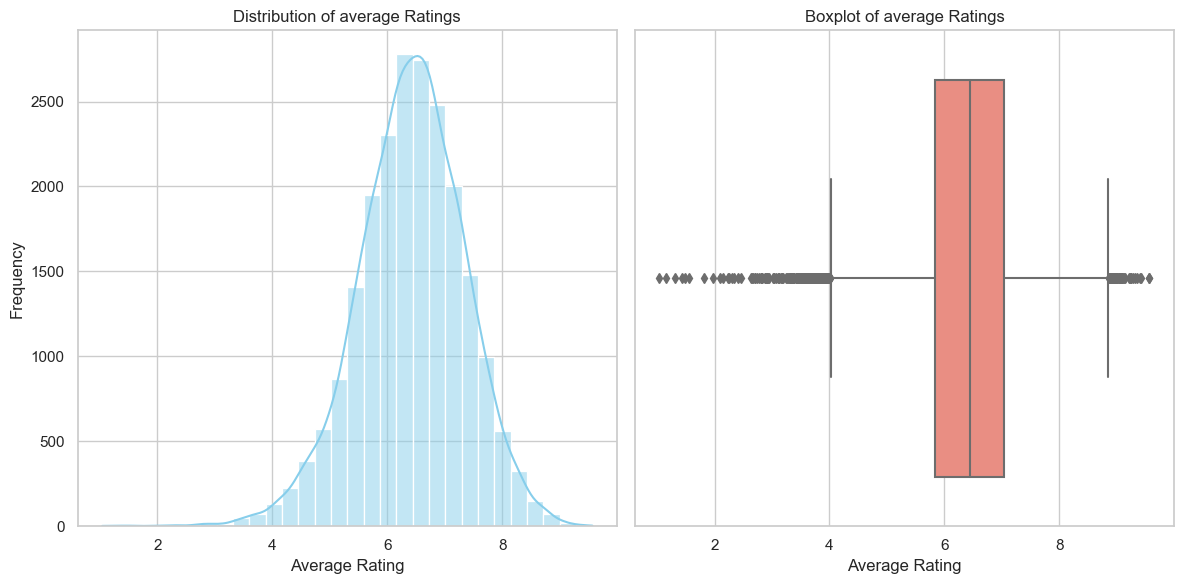

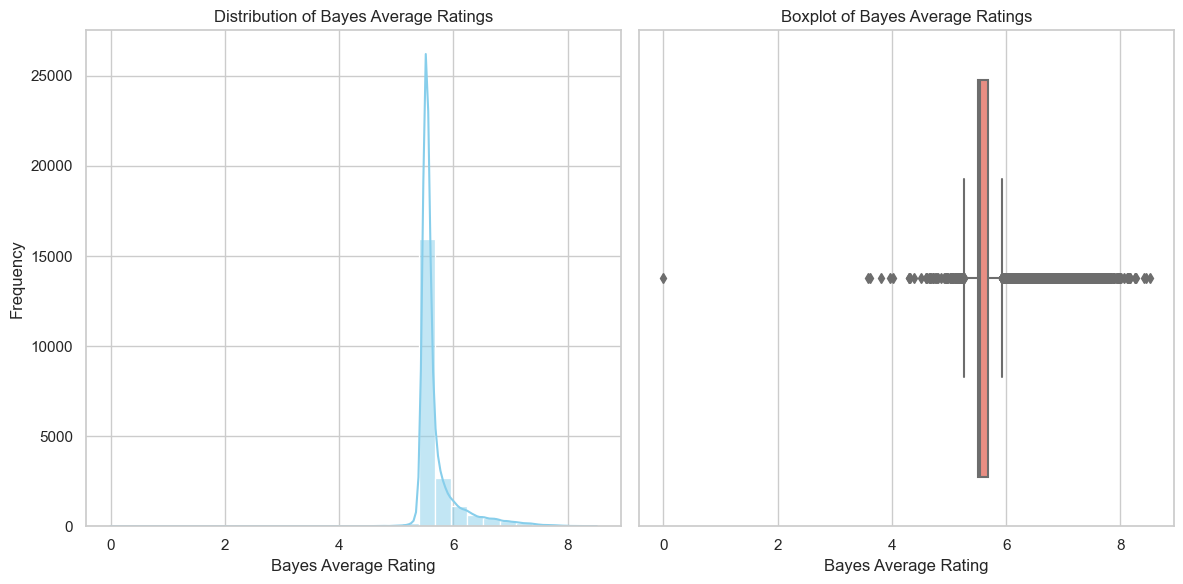

In [39]:
# Set style for Seaborn (optional)
sns.set(style="whitegrid")

# Plot histogram for average
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['average'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')

# Plot boxplot for average
plt.subplot(1, 2, 2)
sns.boxplot(x=df['average'], color='salmon')
plt.title('Boxplot of average Ratings')
plt.xlabel('Average Rating')

plt.tight_layout()
plt.show()

# Plot histogram for bayes_average
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['bayes_average'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Bayes Average Ratings')
plt.xlabel('Bayes Average Rating')
plt.ylabel('Frequency')

# Plot boxplot for bayes_average
plt.subplot(1, 2, 2)
sns.boxplot(x=df['bayes_average'], color='salmon')
plt.title('Boxplot of Bayes Average Ratings')
plt.xlabel('Bayes Average Rating')

plt.tight_layout()
plt.show()


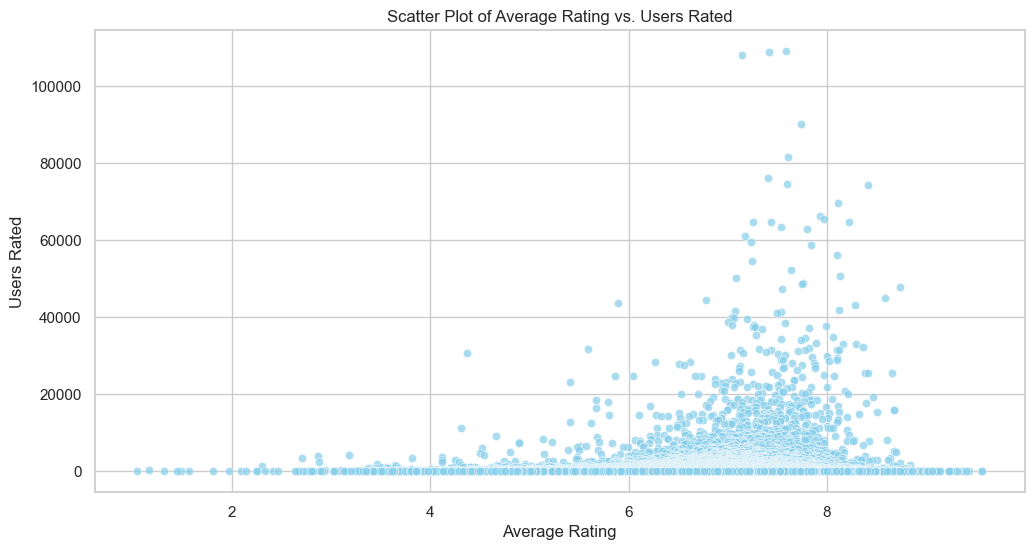

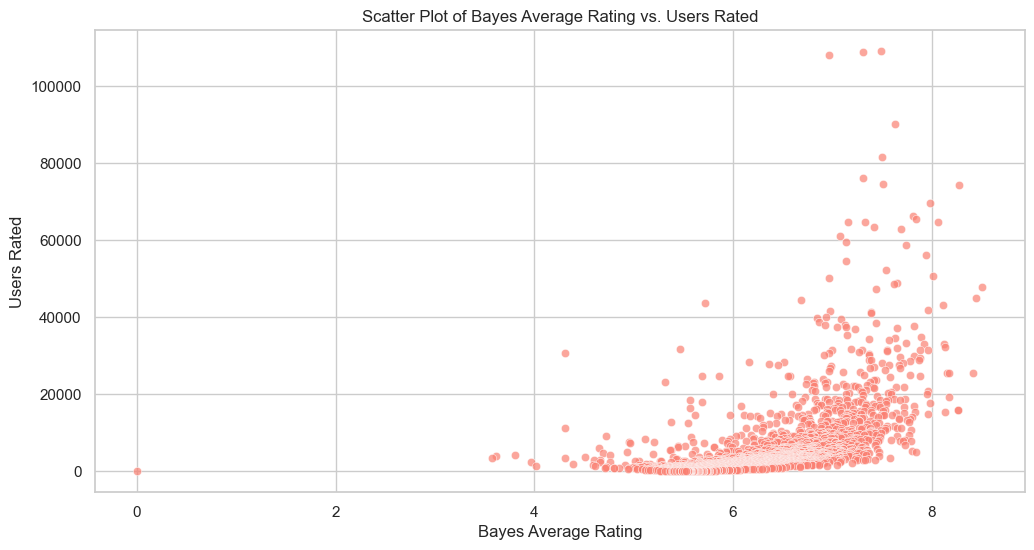

In [42]:
# Scatter plot: average vs. users_rated
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average', y='users_rated', data=df, alpha=0.7, color='skyblue')
plt.title('Scatter Plot of Average Rating vs. Users Rated')
plt.xlabel('Average Rating')
plt.ylabel('Users Rated')
plt.show()

# Scatter plot: bayes_average vs. users_rated
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bayes_average', y='users_rated', data=df, alpha=0.7, color='salmon')
plt.title('Scatter Plot of Bayes Average Rating vs. Users Rated')
plt.xlabel('Bayes Average Rating')
plt.ylabel('Users Rated')
plt.show()


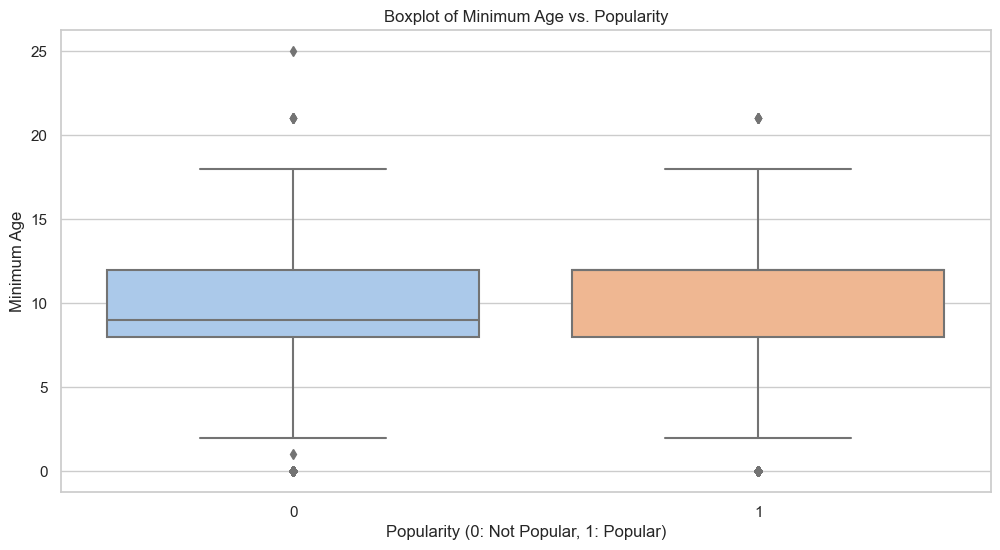

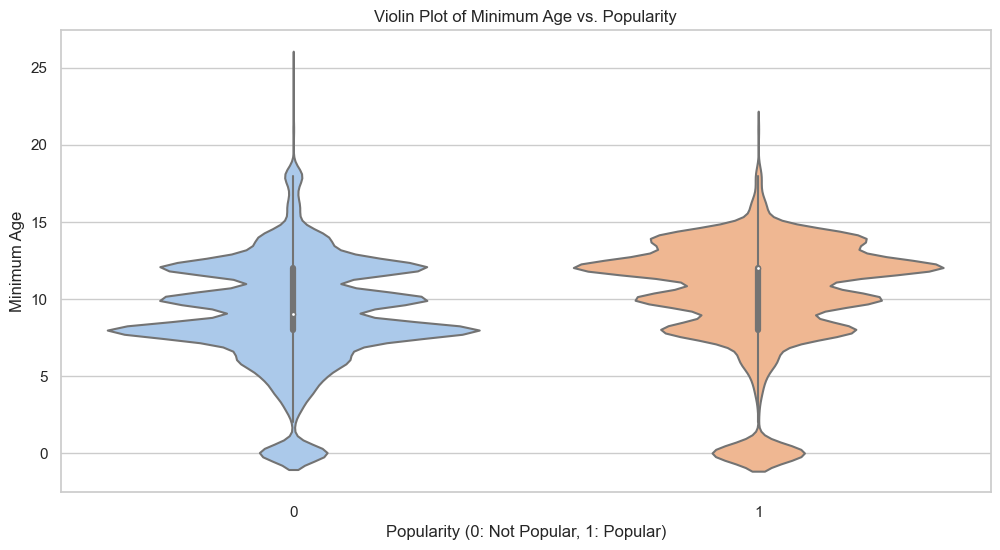

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_popular', y='minage', data=df, palette='pastel')
plt.title('Boxplot of Minimum Age vs. Popularity')
plt.xlabel('Popularity (0: Not Popular, 1: Popular)')
plt.ylabel('Minimum Age')
plt.show()

# Violin plot: minage vs. is_popular
plt.figure(figsize=(12, 6))
sns.violinplot(x='is_popular', y='minage', data=df, palette='pastel')
plt.title('Violin Plot of Minimum Age vs. Popularity')
plt.xlabel('Popularity (0: Not Popular, 1: Popular)')
plt.ylabel('Minimum Age')
plt.show()
